# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [ ]:
#импортируем все то что необходимо нам для построение моделей, возьмем 3 алгоритма ( дерево, случайный лес, логистическая
#регрессия)
import pandas as pd
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#прочитаем файл и сохраним в переменную df
df = pd.read_csv('/datasets/users_behavior.csv')

In [ ]:
#рассмотрим ближе наши данные
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [ ]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
#посмотрим сколько всего строк и столбцов в нашем DF
df.shape

(3214, 5)

## Разбейте данные на выборки

In [ ]:
#Разбиваем данные на признак и целевой признак
features = df.drop(['is_ultra'], axis = 1) #признак
target = df['is_ultra'] #целевой признак 

In [ ]:
# делим нашу выборку 60 на 40, где тренировочных данных мы оставим 60% а тестовые данные 40%
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.40, random_state=12345, stratify = target ) 

In [ ]:
# делим наши тестовые данные пополам где, 50% будет тестовая выборка и 50% будет валидационная выборка
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.5, random_state = 12345, stratify= target_test)

In [ ]:
#проверим как разделились наши выборки
print(features.shape)
print(target.shape)
print('-'* 45)
print('Тренировочная выборка')
print(features_train.shape)
print(target_train.shape)
print('-'* 45)
print('Валидационная выборка')
print(features_valid.shape)
print(target_valid.shape)
print('-'* 45)
print('Тестовая выборка')
print(features_test.shape)
print(target_test.shape)


(3214, 4)
(3214,)
---------------------------------------------
Тренировочная выборка
(1928, 4)
(1928,)
---------------------------------------------
Валидационная выборка
(643, 4)
(643,)
---------------------------------------------
Тестовая выборка
(643, 4)
(643,)


Вывод: разделили выборку на 3 части, на которой мы будем тренировать наши модельки, валидационная выборка и тестовая на которой будем тестить нашу одну 'лучшую модель'

## Исследуйте модели

In [ ]:
%%time
#создаем переменные в которой сохраним лучшую модель, лучшую глубину дерева, лучшее качество предсказания алгоритма
show_tree = []
show_tree_two = []
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0

for depth in range(1, 6):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth= depth) # обучаем модель с заданной глубиной дерева
    model_tree.fit(features_train, target_train ) # обучаем модель
    predictions = model_tree.predict(features_valid) # получам предсказания модели
    result = accuracy_score(target_valid , predictions) # посчитаем качество модели
    #сделаем условие что бы лучшая модель сохранялась в переменную
    show_tree.append(predictions)
    show_tree_two.append(depth)
    if result > best_result_tree:
        best_model_tree = model_tree #сохраним лучшую модель
        best_result_tree = result # сохраним лучший рузельтат качества модели
        best_depth_tree = depth # сохраним лучшую глубину дерева
#Выведем на экран Accuracy лучшей модели

print('Лучшая глубина дерева:', best_depth_tree)
print("Accuracy лучшей модели:","{:.1%}".format( round(best_result_tree, 4)))
print('-' * 45)


Лучшая глубина дерева: 5
Accuracy лучшей модели: 81.2%
---------------------------------------------
CPU times: user 28.7 ms, sys: 2.74 ms, total: 31.4 ms
Wall time: 30.4 ms


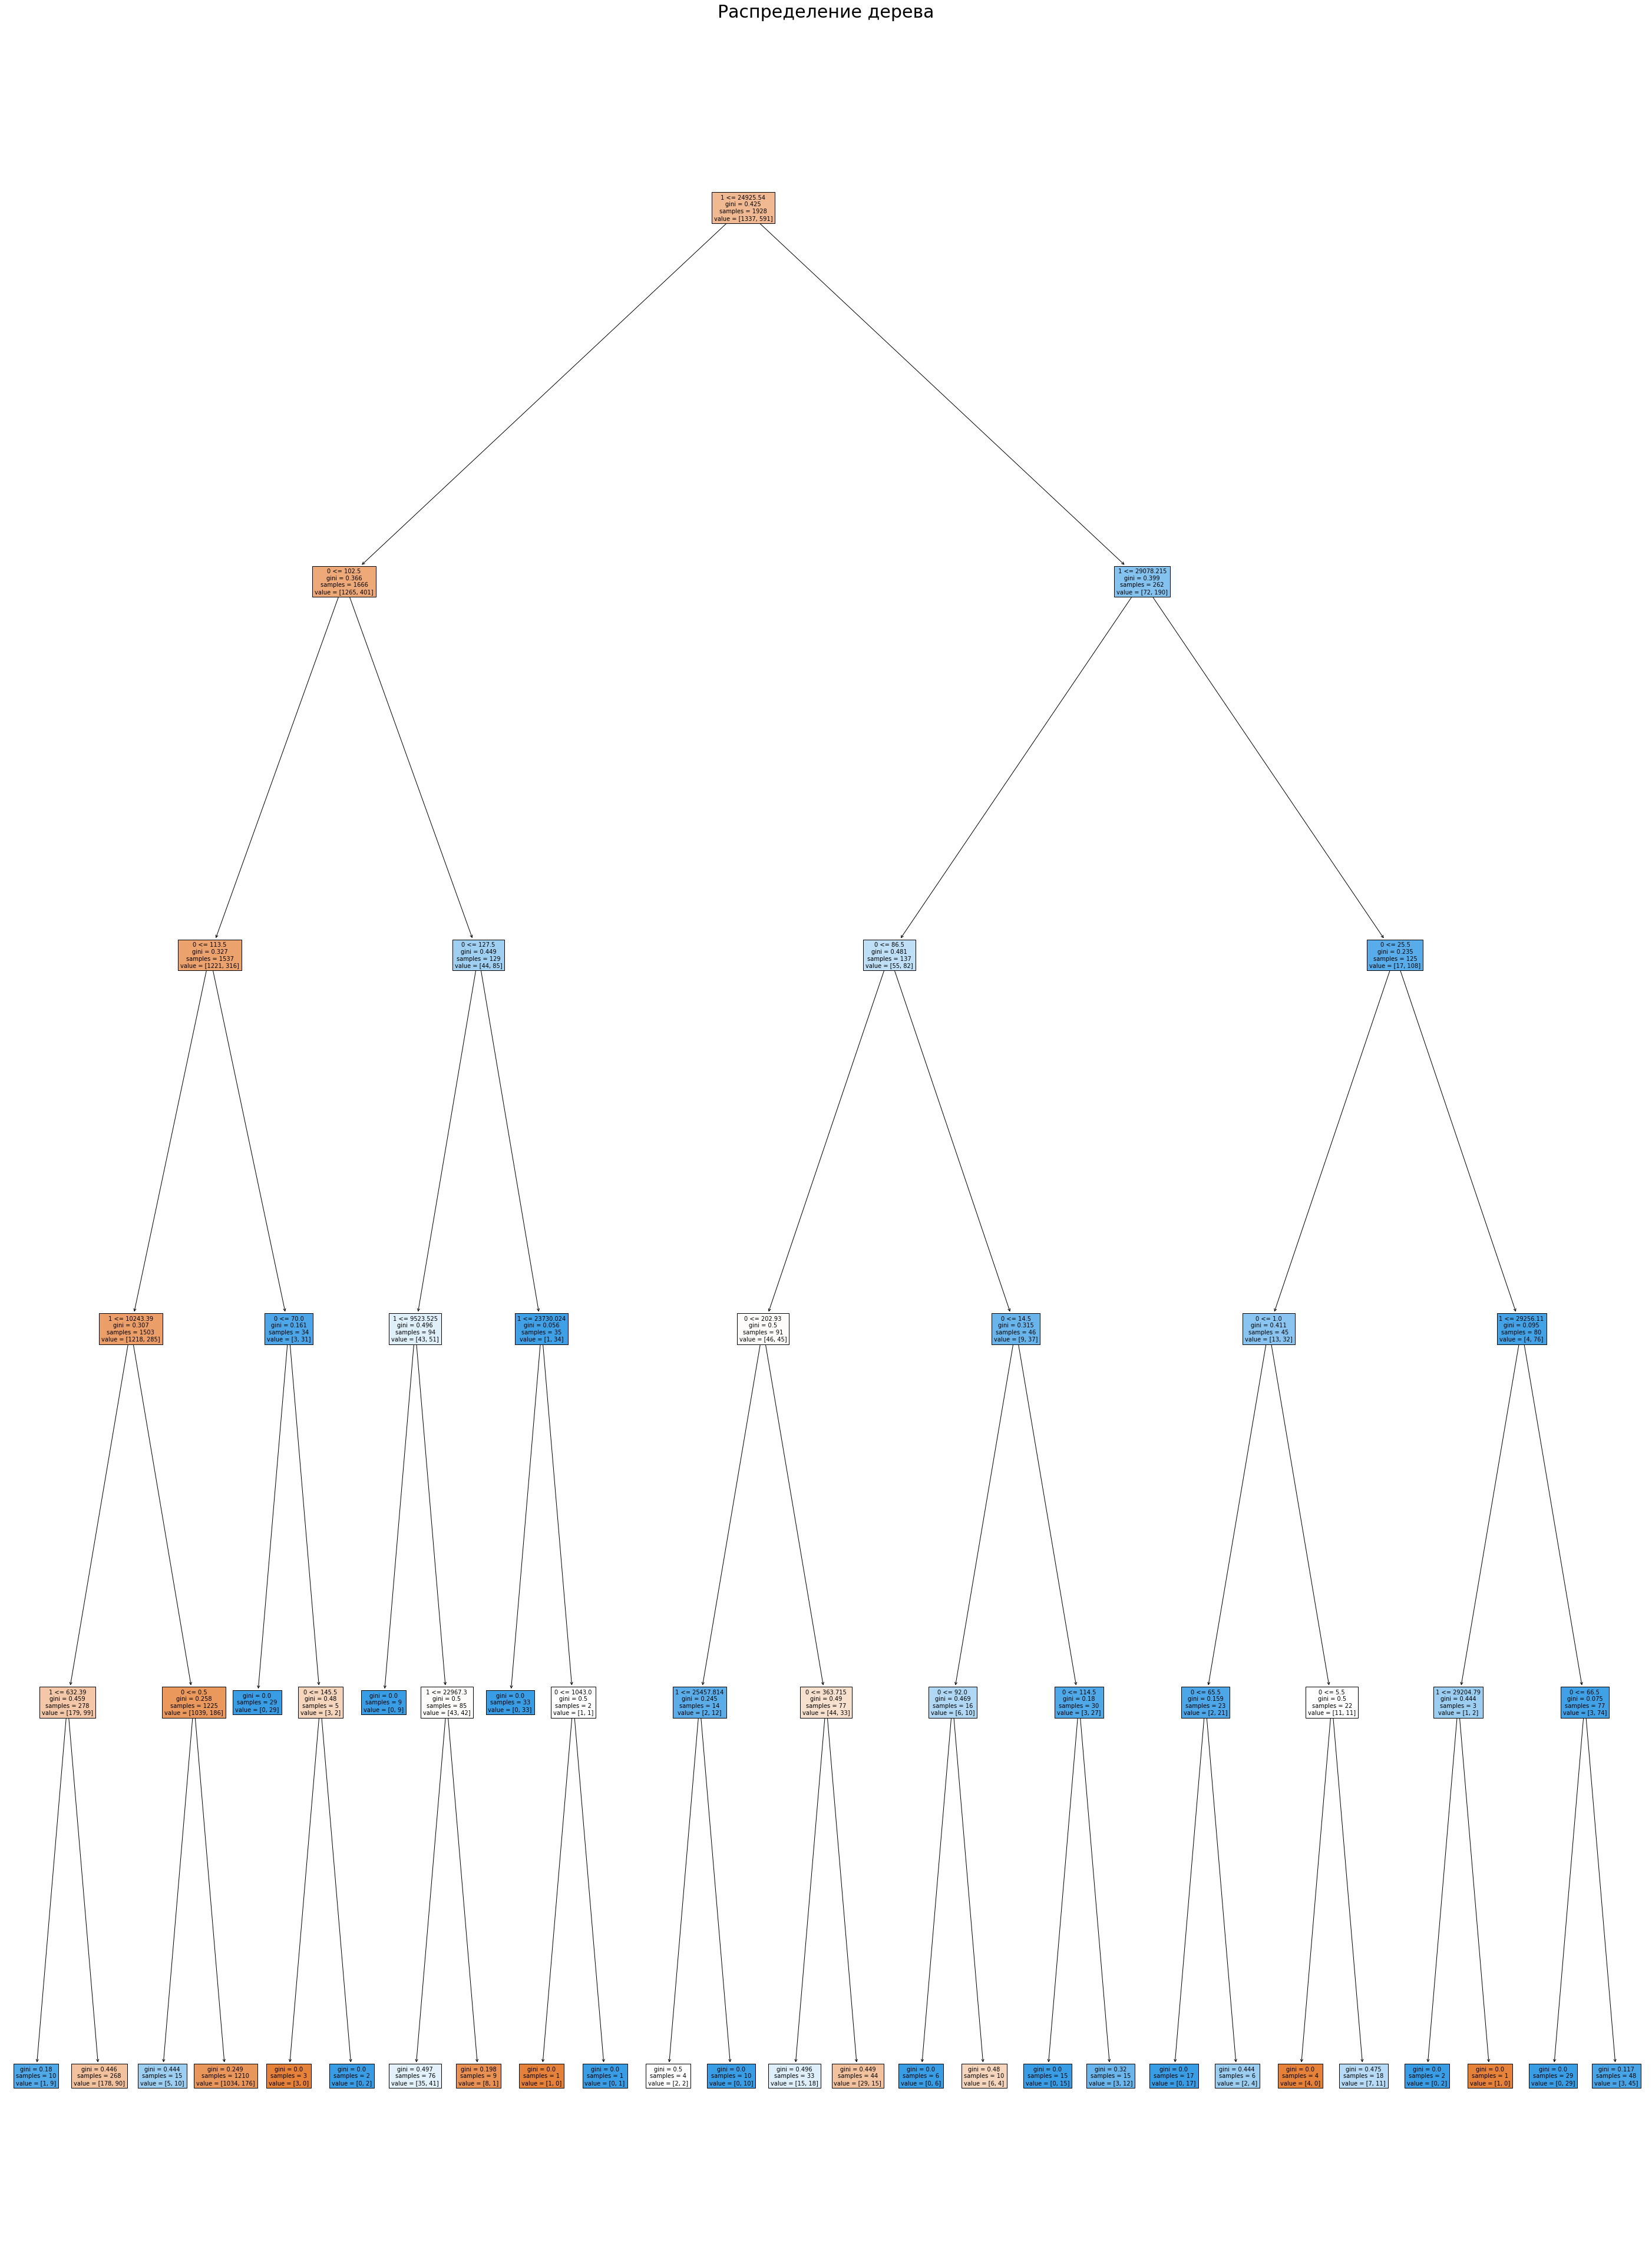

In [ ]:
plt.figure(figsize=(50,70))
tree.plot_tree(model_tree, feature_names=df.is_ultra, filled=True)
plt.title('Распределение дерева', fontsize = 30)
plt.show()

In [ ]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [ ]:
%%time
# создаем переменные в которые будем сохранять лучшую модель , лучший результат, и лучшее количество деревьев
best_model_forest = None
best_result_forest = 0
best_est_forest = 0
max_depth = 0
for depth in tqdm(range(1, 10)):
    for est in range(1, 100):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth) # обучаем модель с заданным количеством деревьев
        model_forest.fit(features_train,target_train) # обучаем модель на тренировочной выборке
        result = model_forest.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
        if result > best_result_forest:
            best_model_forest = model_forest #сохраним наилучшую модель
            best_result_forest = result #сохраним наилучшее значение метрики accuracy на валидационных данных
            best_est_forest = est #сохраним наилучшее значение леса
            max_depth = depth

print("Лучшая глубина дерева", depth)
print('Лучший лес:',best_est_forest )
print("Accuracy наилучшей модели на валидационной выборке:", "{:.1%}".format(round(best_result_forest,4)))

100%|██████████| 9/9 [01:48<00:00, 12.06s/it]

Лучшая глубина дерева 9
Лучший лес: 63
Accuracy наилучшей модели на валидационной выборке: 82.4%
CPU times: user 1min 47s, sys: 622 ms, total: 1min 48s
Wall time: 1min 48s


In [ ]:

model_logist = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=100)
model_logist.fit(features_train, target_train)
model_logist.predict(features_valid)

print("{:.1%}".format(round(model_logist.score(features_valid, target_valid),4)))

74.7%


Вывод: самый лучшая модель на валидационной выборке у нас случайный лес результат '82.4%', ее мы возьмем для того что бы проверить ее на тестовой выборке и сделать прогноз.
Самый худший результат у нас в Логистической модельке, даже 74.7% данных нет правильных ответов.

## Проверьте модель на тестовой выборке

In [ ]:
y_train_validate = pd.concat([target_train,target_valid] )
x_train_validation = pd.concat([features_train, features_valid])

model_forest = RandomForestClassifier(random_state=12345, n_estimators=63, max_depth = 9) # обучаем модель с заданным количеством деревьев
best_model_rf= model_forest.fit(x_train_validation,y_train_validate) # обучаем модель на тренировочной выборке
result = model_forest.score(features_valid, target_valid)

print("{:.1%}".format(result))

89.7%


**вывод:**
- Accuracy наилучшей модели на валидационной выборке у нас получилось 82.4%
- После обьединения выборок наш результат повысился до 89.7%


In [ ]:
predictions = best_model_rf.predict(features_test)
result_forest = round(accuracy_score(target_test, predictions), 4)

"{:.1%}".format(result_forest)

'82.4%'

Вывод: Проверили модель на тестовой выборке где мы не затрагивали эти данные не на обучении не на валидационной выборке. Результат у нас получился не плохой '82.4%' правильных ответов.

## (бонус) Проверьте модели на адекватность

In [ ]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=1)
dummy_clf.fit(features_train, target_train)
dummy_clf.predict(features_test)
accuracy_random_test = dummy_clf.score(features_test, target_test)
print("{:.1%}".format(dummy_clf.score(features_test, target_test)))

69.4%


In [ ]:
if result_forest > accuracy_random_test:
    print('Наша модель лучше, она дает больше правильных ответов на',"{:.1%}".format( round(result_forest - accuracy_random_test, 2)), 'больше правильных ответов чем случайная модель')
else:
    print('Наша модель предсказывает хуже чем случайная модель на',"{:.1%}".format( round(accuracy_random_test - result_forest, 4 )))

Наша модель лучше, она дает больше правильных ответов на 13.0% больше правильных ответов чем случайная модель


**Вывод:** мы сделали случайную модель, она дает нам предсказания мы сравнили предсказания случайной модели с тестовой выборкой посмотрели Accuracy и случайная модель выдала результат '70.6%' а наша модель случайный лес выдала результат '82.4%' что на 13.0% наша модель предсказывает лучше чем случайная модель.

**Вывод:**
- В нашем проекте мы обучили 3 модели, модель дерева, модель случайного леса и модель логической регрессии.
- Лучший результат у нас по моделе Случайный лес правильных ответов на валидационной выборке ( 89.7%) самый худший результат по модели Логистическая регрессия правильных ответов (74.7%).
- Лучшая выбранная модель 'Случайный лес' дал нам на тестовой выборке правильных ответов ('82.4%'), что уже хороший результат для тестовой выборки.
- Последним шагом мы проверили нашу модельку на 'адекватность', т.е. мы создали рандомную таблицу и сравнили с нашей тестовой выборкой, наша модель дала больше правильных предсказаний на (13.0%)  что является хорошим результатам, и мы добились хороших результатов от нашей обученной модели.


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
Красное исправлено, многие желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.



Отличная работа Николай. Желаю успехов в дальнейшей учебе!
